In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:\\Users\\lynet\\OneDrive\\Documents\\2024fall\\Part2\\fish_data.csv')

# Inspect the dataset
print(data.info())
print(data.head())

data.drop(columns=['w_l_ratio'], inplace=True)


# Remove certain classes
classes_to_drop = ['Sillaginopsis panijus', 'Setipinna taty', 'Puntius lateristriga']
data = data[~data['species'].isin(classes_to_drop)]


# Select numerical columns for clustering
numeric_columns = data.select_dtypes('float64').columns
X = data[numeric_columns].values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2727 entries, 0 to 2726
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    2727 non-null   object 
 1   length     2727 non-null   float64
 2   weight     2727 non-null   float64
 3   w_l_ratio  2727 non-null   float64
dtypes: float64(3), object(1)
memory usage: 85.3+ KB
None
              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31


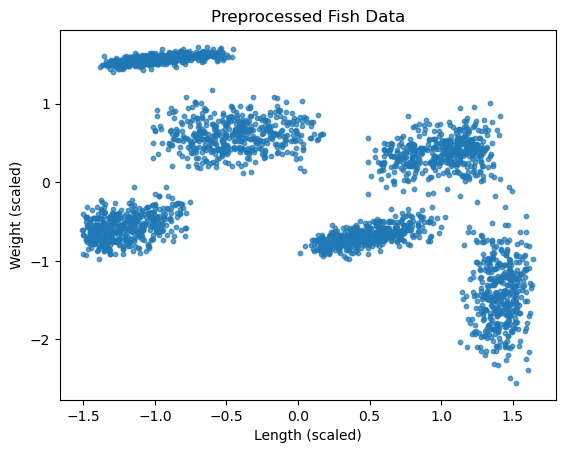

In [3]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the preprocessed data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.7, s=10)
plt.xlabel('Length (scaled)')
plt.ylabel('Weight (scaled)')
plt.title('Preprocessed Fish Data')
plt.show()


                   species  length  weight
0       Anabas testudineus   10.66    3.45
1       Anabas testudineus    6.91    3.27
2       Anabas testudineus    8.38    3.46
3       Anabas testudineus    7.57    3.36
4       Anabas testudineus   10.83    3.38
...                    ...     ...     ...
2722  Polynemus paradiseus   11.61    4.02
2723  Polynemus paradiseus   12.96    4.08
2724  Polynemus paradiseus    9.75    4.04
2725  Polynemus paradiseus   11.49    3.96
2726  Polynemus paradiseus   15.06    3.95

[2727 rows x 3 columns]
=== DBSCAN 1 Parameters ===
DBSCAN(eps=0.12, min_samples=4)
Labels: [ 0  1  1  1 -1  1  1  1  1  1]
Length of core sample indices: 2497
Core Sample Indices: [ 0  1  2  3  5  6  7  8  9 10]
Components:
[[10.66  3.45]
 [ 6.91  3.27]
 [ 8.38  3.46]]
Unique Labels:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


KNeighborsClassifier(n_neighbors=50)
[13  1  1 ... 11 13 13]
[[0.24 0.22 0.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  

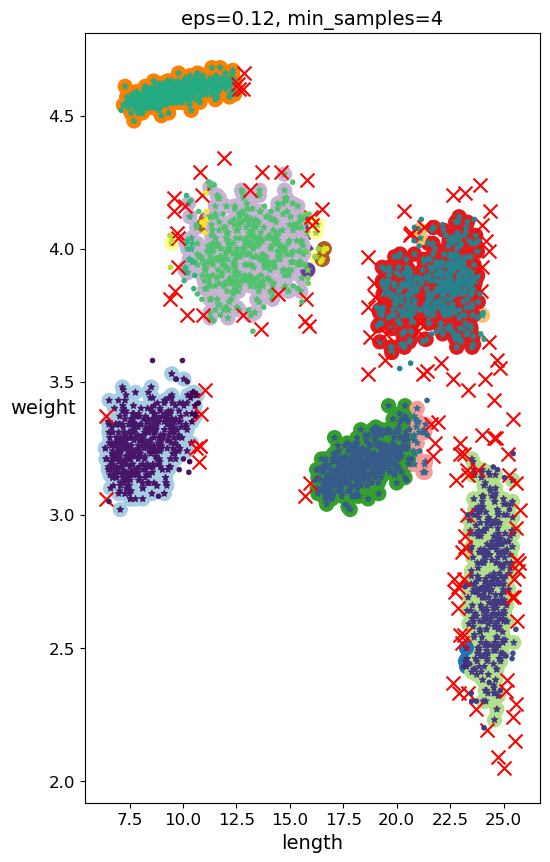

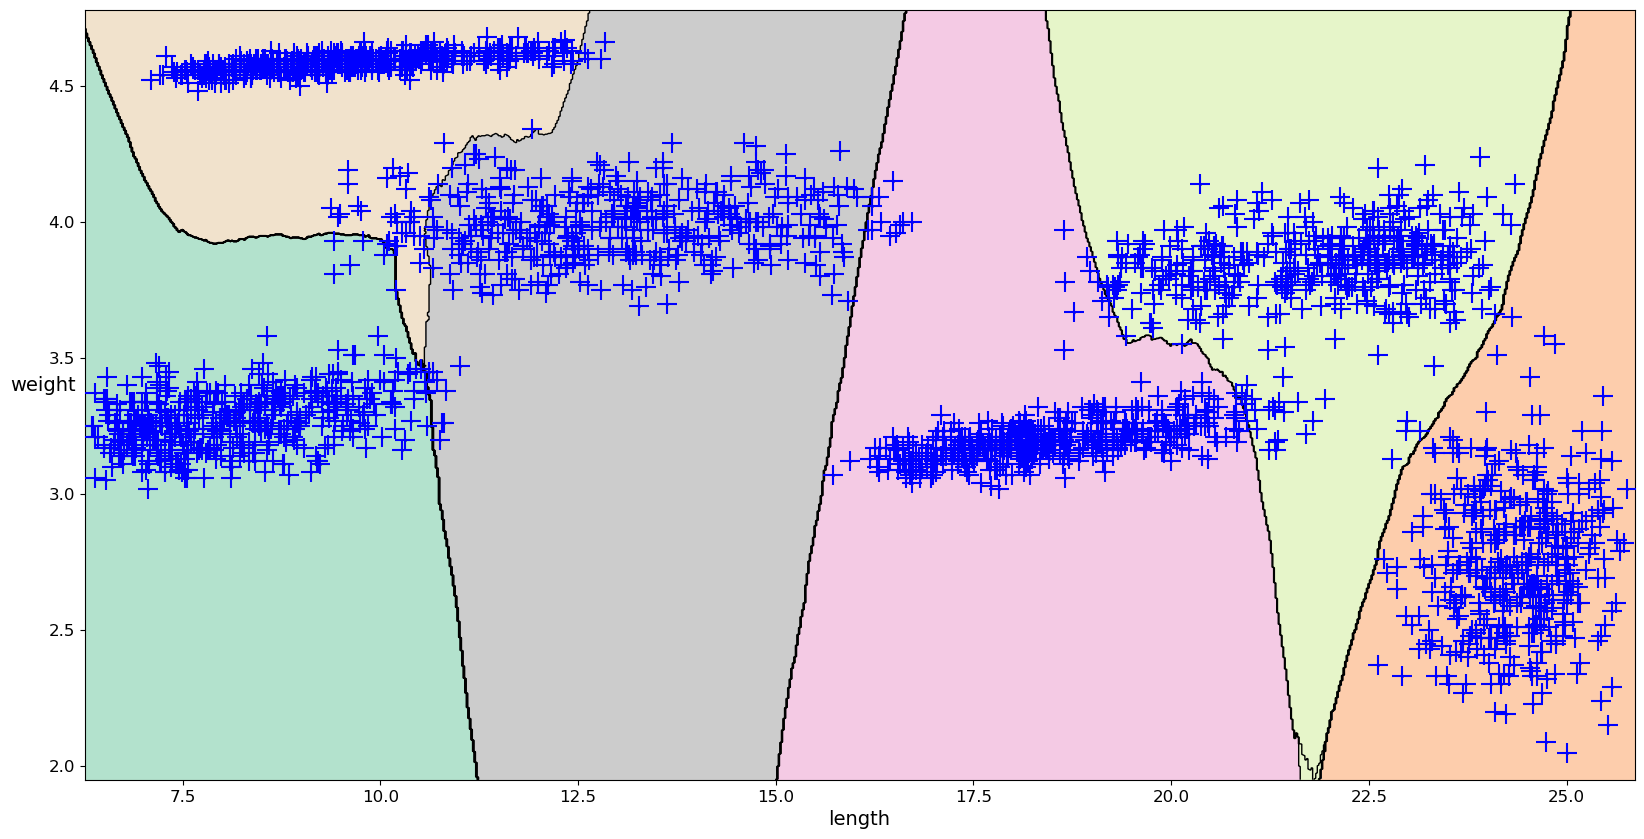

=== DBSCAN 2 Parameters ===
DBSCAN(eps=0.15)
Labels: [0 0 0 0 0 0 0 0 0 0]
Length of core sample indices: 2546
Core Sample Indices: [ 0  1  2  3  5  6  7  8  9 10]
Components:
[[10.66  3.45]
 [ 6.91  3.27]
 [ 8.38  3.46]]
Unique Labels:
[-1  0  1  2  3  4  5  6  7  8]


KNeighborsClassifier(n_neighbors=50)
[6 0 0 ... 5 6 6]
[[0.42 0.   0.   ... 0.58 0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.16 0.   0.04]
 [0.   0.   0.   ... 1.   0.   0.  ]
 [0.   0.   0.   ... 1.   0.   0.  ]]


[ 0  0  0 ... -1  6  6]
=== END OF DBSCAN 2 ===



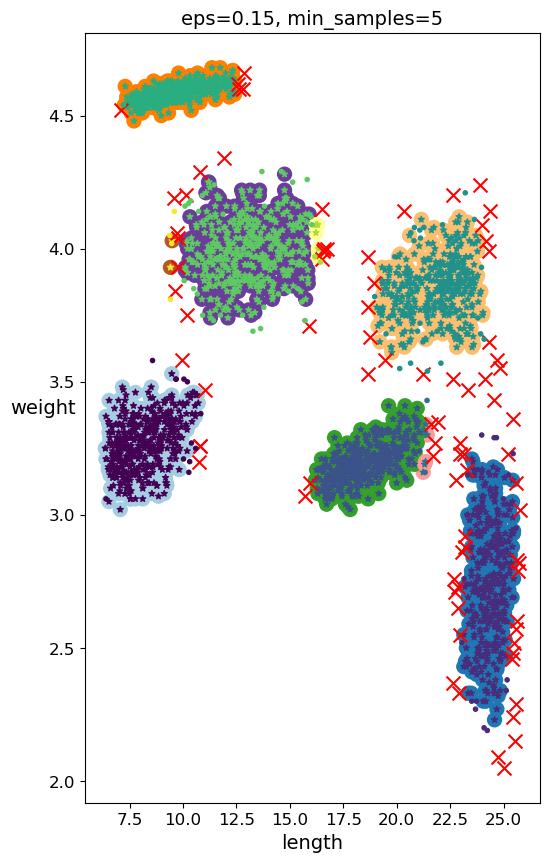

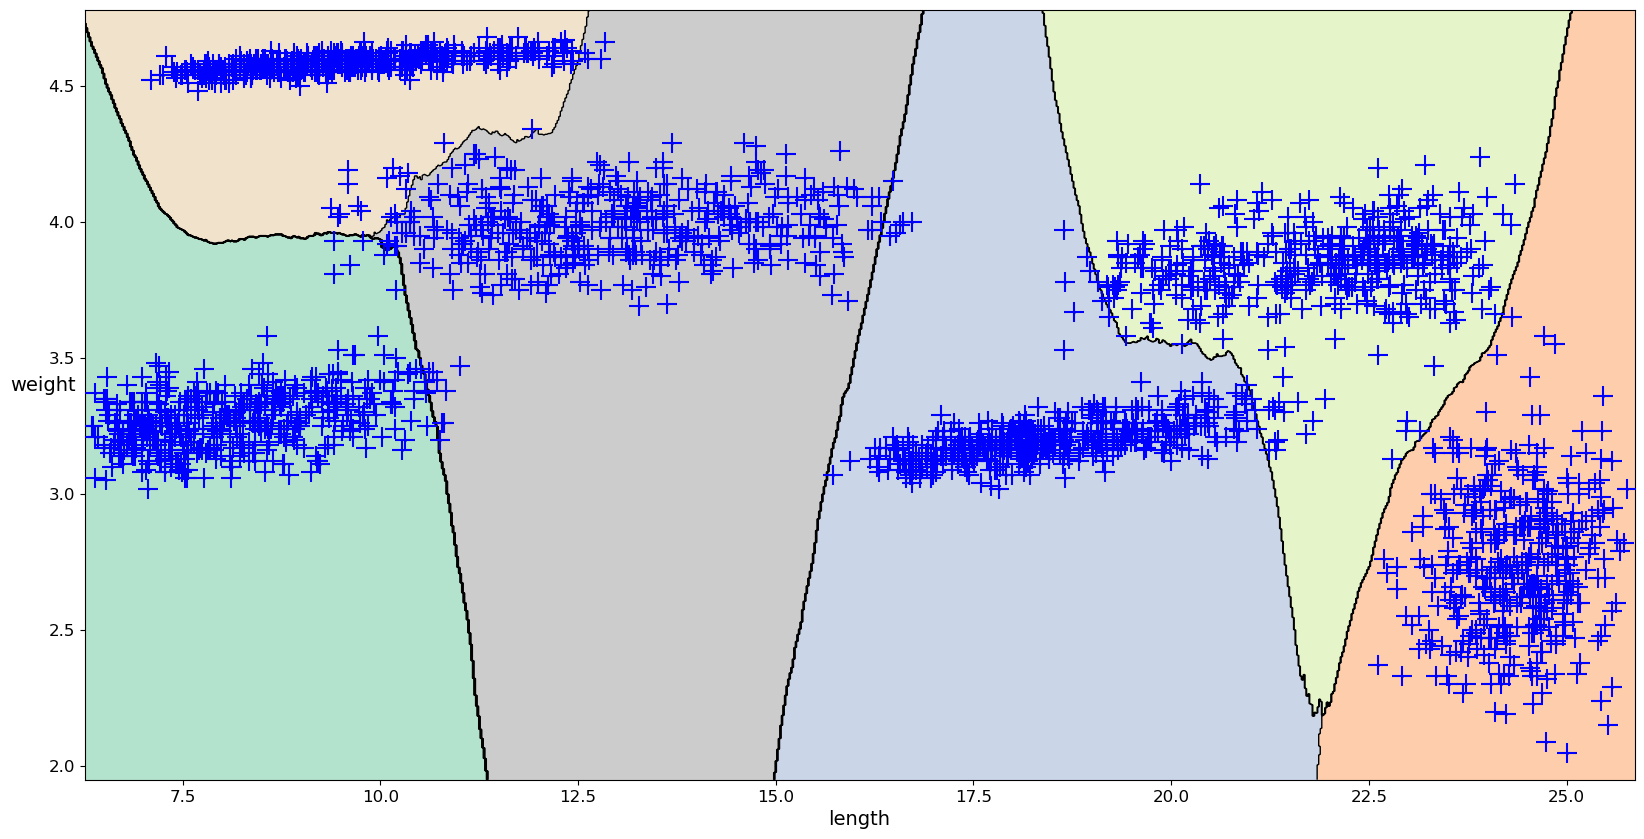

=== DBSCAN 3 Parameters ===
DBSCAN(eps=0.19, min_samples=6)
Labels: [0 0 0 0 0 0 0 0 0 0]
Length of core sample indices: 2613
Core Sample Indices: [ 0  1  2  3  5  6  7  8  9 10]
Components:
[[10.66  3.45]
 [ 6.91  3.27]
 [ 8.38  3.46]]
Unique Labels:
[-1  0  1  2  3  4  5  6  7  8]


KNeighborsClassifier(n_neighbors=50)
[0 0 0 ... 4 5 5]
[[0.5  0.   0.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.04 0.   0.   ... 0.   0.04 0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


[0 0 0 ... 7 5 5]
=== END OF DBSCAN 3 ===



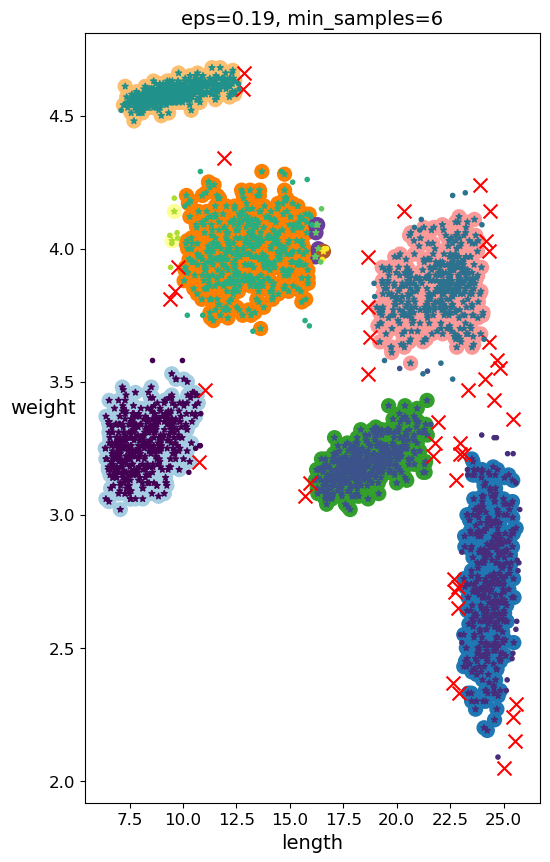

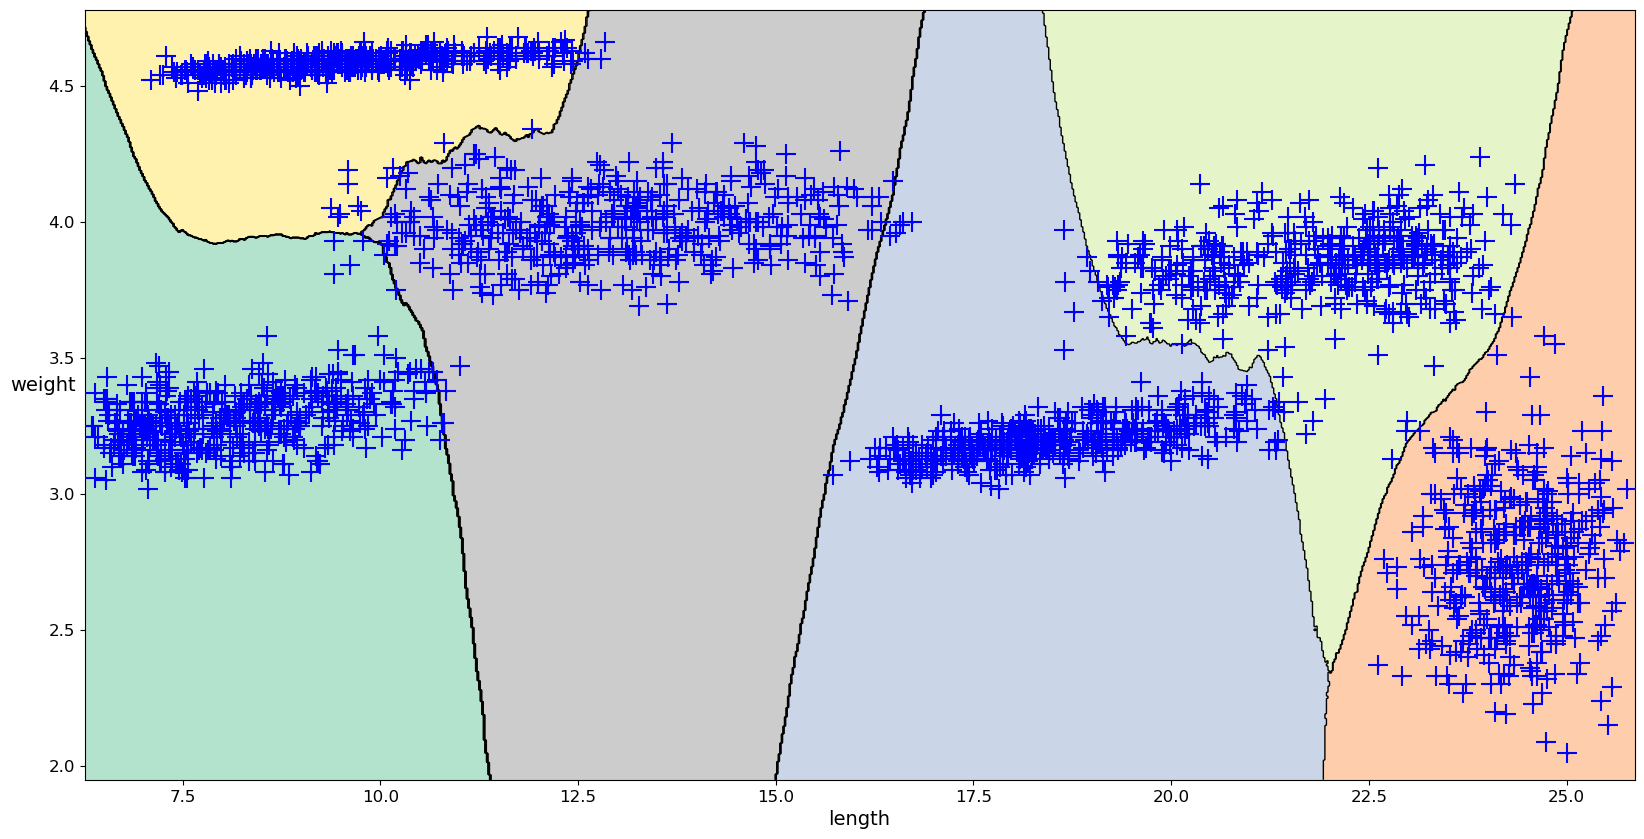

In [44]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN 
from sklearn.cluster import SpectralClustering 
from sklearn.metrics import silhouette_score 
from sklearn.neighbors import KNeighborsClassifier
import sys 
assert sys.version_info >= (3, 5) 
import sklearn 
assert sklearn.__version__ >= "0.20" 
import numpy as np 
np.random.seed(42) 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12)
# Load and preprocess the dataset
file_path = 'C:\\Users\\lynet\\OneDrive\\Documents\\2024fall\\Part2\\fish_data.csv' 
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.dropna(axis=0, how='any', inplace=True) 
data.drop(columns=['w_l_ratio'], inplace=True)

# Remove specific classes
classes_to_drop = ['Sillaginopsis panijus', 'Setipinna taty', 'Puntius lateristriga']
data = data[~data['species'].isin(classes_to_drop)] 
print(data)

# Select numerical columns
numericColumns = data.select_dtypes('float64').columns
X = data[numeric_columns].values


# Define and test DBSCAN parameters
param_combinations = [
    {'eps': 0.12, 'min_samples': 4},
    {'eps': 0.15, 'min_samples': 5},
    {'eps': 0.19, 'min_samples': 6}
]

cluster_counts = [] 
knn = KNeighborsClassifier(n_neighbors=50) 

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True): 
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool) 
    core_mask[dbscan.core_sample_indices_] = True 
    anomalies_mask = dbscan.labels_ == -1 
    non_core_mask = ~(core_mask | anomalies_mask) 
 
    cores = dbscan.components_ 
    anomalies = X[anomalies_mask] 
    non_cores = X[non_core_mask] 
     
    plt.scatter(cores[:, 0], cores[:, 1], 
                c=dbscan.labels_[core_mask], marker='o', s=size, 
cmap="Paired") 
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, 
c=dbscan.labels_[core_mask]) 
    plt.scatter(anomalies[:, 0], anomalies[:, 1], 
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], 
c=dbscan.labels_[non_core_mask], marker=".") 
    if show_xlabels: 
        plt.xlabel(numericColumns[0], fontsize=14) 
    else: 
        plt.tick_params(labelbottom=False) 
    if show_ylabels: 
        plt.ylabel(numericColumns[1], fontsize=14, rotation=0) 
    else: 
        plt.tick_params(labelleft=False) 
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, 
dbscan.min_samples), fontsize=14)
def plot_data(X): 
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2) 
 
def plot_centroids(centroids, weights=None, circle_color='w', 
cross_color='k'): 
    if weights is not None: 
        centroids = centroids[weights > weights.max() / 10] 
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                marker='o', s=35, linewidths=8, 
                color=circle_color, zorder=10, alpha=0.9) 
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, 
show_centroids=True, 
                             show_xlabels=True, show_ylabels=True): 
    mins = X.min(axis=0) - 0.1 
    maxs = X.max(axis=0) + 0.1 
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), 
                         np.linspace(mins[1], maxs[1], resolution)) 
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), 
                cmap="Pastel2") 
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), 
                linewidths=1, colors='k') 
    plot_data(X) 
    if show_centroids: 
        plot_centroids(clusterer.cluster_centers_) 
 
    if show_xlabels: 
        plt.xlabel(numericColumns[0], fontsize=14) 
    else: 
        plt.tick_params(labelbottom=False) 
    if show_ylabels: 
        plt.ylabel(numericColumns[1], fontsize=14, rotation=0) 
    else: 
        plt.tick_params(labelleft=False)
for i, params in enumerate(param_combinations): 
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples']) 
    print(f"=== DBSCAN {i+1} Parameters ===") 
    print(dbscan.fit(X)) 
 
    unique_labels = np.unique(dbscan.labels_) 
    num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0) 
    cluster_counts.append(num_clusters) 
 
    print("=========================") 
    print('Labels:', dbscan.labels_[:10]) 
    print('Length of core sample indices:', 
len(dbscan.core_sample_indices_)) 
    print('Core Sample Indices:', dbscan.core_sample_indices_[:10]) 
    print('Components:') 
    print(dbscan.components_[:3]) 
    print('Unique Labels:') 
    print(np.unique(dbscan.labels_)) 
    print('\n') 
    plt.figure(figsize=(20, 10)) 
    plt.subplot(1, len(param_combinations), i + 1) 
    plot_dbscan(dbscan, X, size=100) 
 
    print(knn.fit(dbscan.components_, 
dbscan.labels_[dbscan.core_sample_indices_])) 
    print(knn.predict(X)) 
    print(knn.predict_proba(X)) 
    print('\n') 
    y_dist, y_pred_idx = knn.kneighbors(X, n_neighbors=1) 
    y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx] 
    y_pred[y_dist > 0.2] = -1 
    print(y_pred.ravel()) 
     
    print(f"=== END OF DBSCAN {i+1} ===\n") 
 
    plt.figure(figsize=(20, 10)) 
    plot_decision_boundaries(knn, X, show_centroids=False) 
    plt.scatter(X[:, 0], X[:, 1], c="b", marker="+", s=200, zorder=10) 
    plt.show()

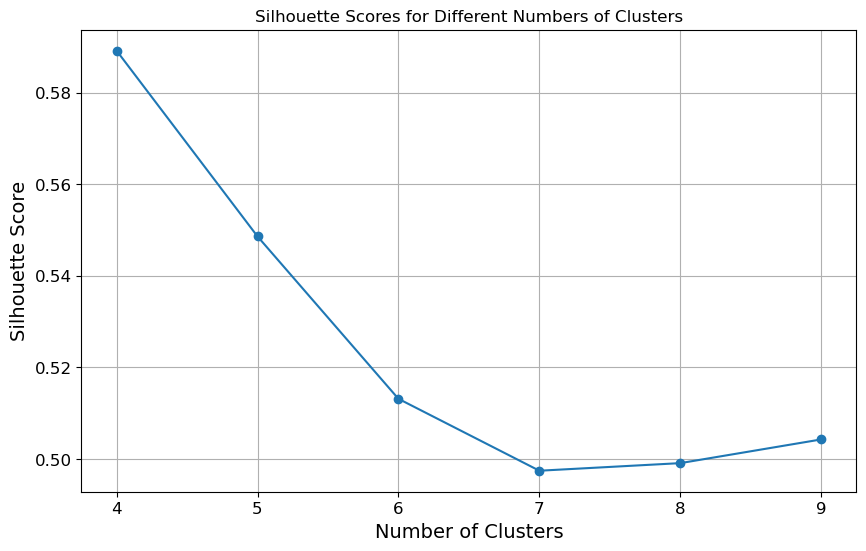

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters=range(4, 10) 
silhouette_scores = [] 
kmeans_per_k = [] 
for n_clusters in range_n_clusters: 
    kmeans = KMeans(n_clusters=n_clusters, random_state=0) 
    cluster_labels = kmeans.fit_predict(data[numericColumns]) 
    silhouette_avg = silhouette_score(data[numericColumns], cluster_labels) 
    silhouette_scores.append(silhouette_avg) 
    kmeans_per_k.append(kmeans) 
  
plt.figure(figsize=(10, 6)) 
plt.plot(range_n_clusters, silhouette_scores, marker='o') 
plt.title("Silhouette Scores for Different Numbers of Clusters") 
plt.xlabel("Number of Clusters") 
plt.ylabel("Silhouette Score") 
plt.xticks(range_n_clusters) 
plt.grid() 
plt.show() 


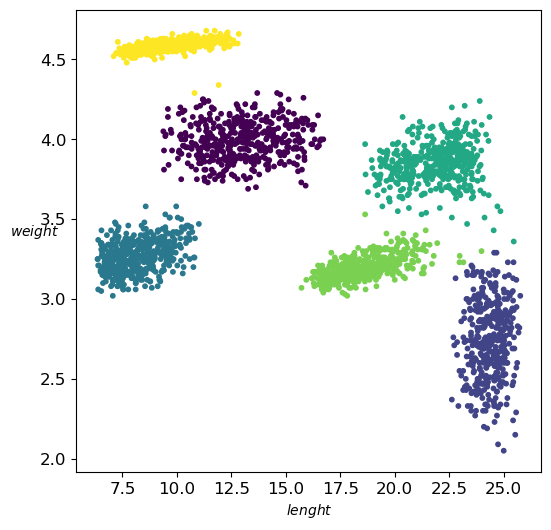

In [73]:
num_data=data[numericColumns] 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(num_data[numericColumns]) 
kmeans = KMeans(n_clusters=6, random_state=6) 
y = kmeans.fit_predict(scaled_data) 
def plot_clusters(num_data, y=None):  
    plt.scatter(num_data.iloc[:, 0], num_data.iloc[:, 1], c=y, s=10) 
    plt.xlabel("$lenght$", fontsize=10) 
    plt.ylabel("$weight$", fontsize=10, rotation=0) 
plt.figure(figsize=(6, 6)) 
plot_clusters(num_data[numericColumns], y) 
plt.show() 


In [81]:
sc1 = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', 
n_neighbors=10, gamma=1, random_state=42) 
sc1.fit(scaled_data)

C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', gamma=1, n_clusters=6,
                   random_state=42)

In [83]:
sc2 = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', 
n_neighbors=13, gamma=100, random_state=42) 
sc2.fit(scaled_data)

C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', gamma=100, n_clusters=6,
                   n_neighbors=13, random_state=42)

In [85]:
SpectralClustering(affinity='nearest_neighbors', gamma=1, n_clusters=2, 
                   random_state=42) 

np.percentile(sc1.affinity_matrix_, 95) 

<2727x2727 sparse matrix of type '<class 'numpy.float64'>'
	with 32457 stored elements in Compressed Sparse Row format>

In [109]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, 
show_ylabels=True): 
    plt.scatter(X[:, 0], X[:, 1], marker='x', s=size, c='green', 
cmap="Paired", alpha=alpha) 
    plt.scatter(X[:, 0], X[:, 1], marker='x', s=30, c='w') 
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, 
cmap="Paired") 
     
    if show_xlabels: 
        plt.xlabel(numericColumns[0], fontsize=14) 
    else: 
        plt.tick_params(labelbottom=False) 
    if show_ylabels: 
        plt.ylabel(numericColumns[1], fontsize=14, rotation=0) 
    else: 
        plt.tick_params(labelleft=False) 
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14) 

C:\Users\lynet\AppData\Local\Temp\ipykernel_4108\1802152998.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], marker='x', s=size, c='green',


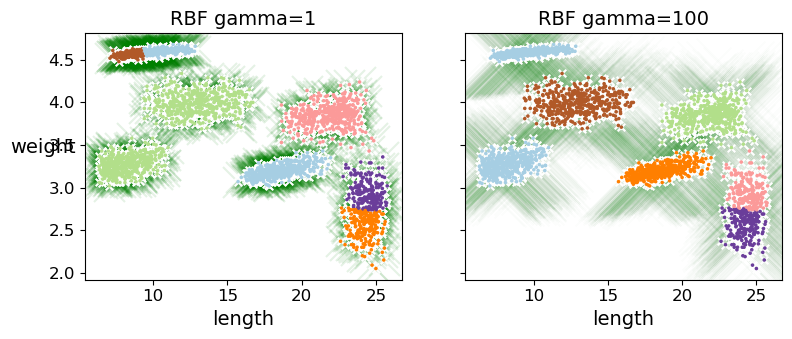

In [111]:
plt.figure(figsize=(9, 3.2)) 
 
plt.subplot(121) 
plot_spectral_clustering(sc1, X, size=500, alpha=0.1) 
 
plt.subplot(122) 
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False) 
 
plt.show() 
